In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
# 한글을 쓰면 폰트가 깨지기 때문에 사용할 폰트를 직접 컴퓨터에 있는 폰트로 지정.
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.TTF" 
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


In [11]:
map_df = gpd.read_file("Seoul.shp", encoding = "euc-KR")

map_df.replace(["서울시노원구",'서울시도봉구','서울시성북구'],
              ['노원구', '도봉구','성북구'], inplace=True)
map_df.rename(columns={'SGG_NM':'행정구'}, inplace=True)
map_df.head()

,ADM_SECT_C,행정구,SGG_OID,COL_ADM_SE,GID,geometry
0,11740,강동구,337,11740,127,"POLYGON ((969713.132 1948846.288, 969692.451 1..."
1,11710,송파구,1969,11710,128,"POLYGON ((968640.372 1944982.492, 968640.957 1..."
2,11680,강남구,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1..."
3,11650,서초구,33,11650,130,"POLYGON ((958117.753 1940073.855, 958118.398 1..."
4,11620,관악구,33,11620,131,"POLYGON ((949321.250 1944035.054, 949323.256 1..."


In [4]:
df = pd.read_csv('data/02_행정구별코로나확진자수.csv',encoding = 'euc-KR')
df = df[['행정구','확진자수']]
df.head()

,행정구,확진자수
0,강남구,5976
1,강동구,3099
2,강북구,2144
3,강서구,3713
4,관악구,4564


In [13]:
# 두 데이터프레임을 합치기 전에 행정구를 오름차순으로 정렬하기

map_df = map_df.sort_values(by='행정구')
map_df.reset_index(inplace=True, drop = True)
map_df.tail()

,ADM_SECT_C,행정구,SGG_OID,COL_ADM_SE,GID,geometry
20,11170,용산구,33,11170,149,"POLYGON ((950928.287 1948418.327, 950930.260 1..."
21,11380,은평구,33,11380,140,"POLYGON ((952498.312 1959929.591, 952498.137 1..."
22,11110,종로구,353,11110,151,"POLYGON ((953559.701 1959304.587, 953628.607 1..."
23,11140,중구,33,11140,150,"POLYGON ((954954.947 1952206.742, 954975.307 1..."
24,11260,중랑구,33,11260,145,"POLYGON ((963794.032 1957867.661, 963796.287 1..."


In [14]:
# Join

merged = pd.merge(map_df, df, on='행정구')

merged.head()

,ADM_SECT_C,행정구,SGG_OID,COL_ADM_SE,GID,geometry,확진자수
0,11680,강남구,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1...",5976
1,11740,강동구,337,11740,127,"POLYGON ((969713.132 1948846.288, 969692.451 1...",3099
2,11305,강북구,49,11305,143,"POLYGON ((956313.265 1965176.336, 956401.172 1...",2144
3,11500,강서구,65,11500,136,"MULTIPOLYGON (((935035.249 1950923.294, 935041...",3713
4,11620,관악구,33,11620,131,"POLYGON ((949321.250 1944035.054, 949323.256 1...",4564


C:\Users\sja95\AppData\Local\Temp/ipykernel_4196/1051393012.py:21: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=row['행정구'], xy=row['coords'],


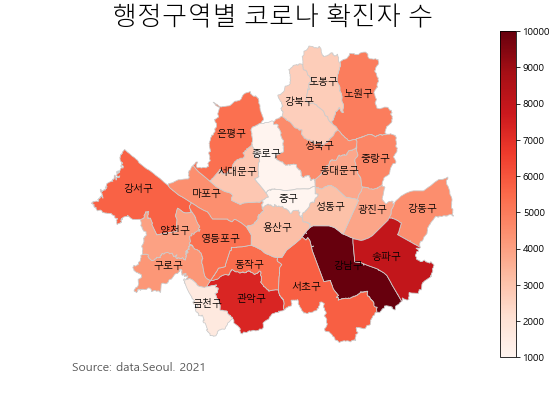

In [35]:
# 시각화 할 column

variable = '확진자수'

# choropleth 범위 설정

vmin, vmax = 1000, 10000

# figure, axes 생성

fig, ax = plt.subplots(1, figsize = (10, 6))

merged.plot(column = variable, cmap = 'Reds', linewidth = 0.8, ax = ax, 
           edgecolor = '0.8')
#for i in range(len(merged.index)):
#     plt.annotate(s=merged.index[i], xy=merged.loc[i,'geometry'],
#                horizontalalignment='center')
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]
for idx, row in merged.iterrows():
    plt.annotate(s=row['행정구'], xy=row['coords'],
                horizontalalignment='center', color='black')

ax.axis('off') # 축 제거

# title

ax.set_title('행정구역별 코로나 확진자 수', fontdict = {'fontsize':'25','fontweight':'3'})

# 출처 

ax.annotate('Source: data.Seoul. 2021', xy = (0.1, .08),
           xycoords = 'figure fraction', horizontalalignment='left',
           verticalalignment='top',fontsize=12,color='#555555')

# 우측에 범위 표시

sm = plt.cm.ScalarMappable(cmap = "Reds", norm = plt.Normalize(vmin = vmin, vmax = vmax))

sm._A = []
cbar = fig.colorbar(sm)

fig.savefig("시각화/02_1_행정구별_코로나확진자.png", dpi = 300)